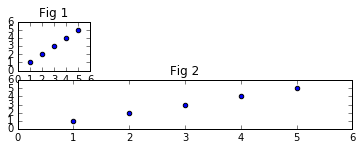

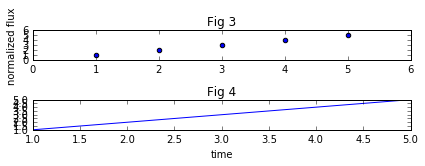

In [37]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.figure(1)
ax1 = plt.subplot(441)
ax1.set_title('Fig 1')
ax1.scatter(x,y)
ax2 = plt.subplot(412)
ax2.scatter(x,y)
ax2.set_title('Fig 2')
plt.figure(2)
ax3 = plt.subplot(413)
plt.ylabel('normalized flux')
ax3.scatter(x,y)
ax3.set_title('Fig 3')
ax4 = plt.subplot(414)
ax4.plot(x,y)
ax4.set_title('Fig 4')
plt.xlabel('time')
plt.tight_layout()
plt.show()


In [43]:
# import pandas as pd
import numpy as np
import pandas as pd
f1 = [[1,2,3],[2,3,1],[3,1,2]]
f2 = f3 = [1,2,3]
df = pd.DataFrame({'f1':f1,'f2':f2,'f3':f3},index=['alpha','bravo','charlie'])
df['f4']=list(np.array([[1,2,3],[2,3,1],[3,1,2]]))
df

,f1,f2,f3,f4
alpha,"[1, 2, 3]",1,1,"[1, 2, 3]"
bravo,"[2, 3, 1]",2,2,"[2, 3, 1]"
charlie,"[3, 1, 2]",3,3,"[3, 1, 2]"


In [22]:
df.f1['alpha'][0] == df.f1[0][0]

True

In [58]:
'KPLR'==df2.index[0]

True

In [1]:
from numbapro import cuda
import numpy as np

@cuda.autojit
def clusterIndsCuda(da,db):
    bx = cuda.blockIdx.x # which block in the grid?
    bw = cuda.blockDim.x # what is the size of a block?
    tx = cuda.threadIdx.x # unique thread ID within a blcok
    i = tx + bx * bw
        
    if i<=len(da):
        db[i]=da[i]*spam
    else:
        return
    
def main():
    global spam
    spam = 50

    # Allocate host memory arrays
    a = np.arange(10000)
    N = len(a)
    b = np.empty(N)
    
    # Allocate and copy GPU/device memory
    d_a = cuda.to_device(a)
    d_b = cuda.to_device(b)
    threads_per_block = 128
    number_of_blocks =N/128+1 ## FIXME: given the threads_per_block is set, determine how many blocks we need ##

    clusterIndsCuda [ number_of_blocks, threads_per_block ] (d_a,d_b) ## FIXME: what variables do we pass? ##, N 

    ## FIXME: copy the vector c from the GPU back to the host ##
    d_b.copy_to_host(b)
    print(len(b))
    return b
main() # Execute the program

numbapro:1: ImportWarning: The numbapro package is deprecated in favour of the accelerate package. Please update your code to use equivalent functions from accelerate.
/home/dgiles/anaconda/lib/python2.7/site-packages/numba/cuda/decorators.py:107: UserWarning: autojit is deprecated and will be removed in a future release. Use jit instead.
  warn('autojit is deprecated and will be removed in a future release. Use jit instead.')


10000


array([  0.00000000e+00,   5.00000000e+01,   1.00000000e+02, ...,
         4.99850000e+05,   4.99900000e+05,   4.99950000e+05])

In [26]:
import pandas as pd
from multiprocessing import Pool,cpu_count
import sys
sys.path.append('python')
import keplerml
def poolRKC(fitsDir,files):
        # Read in kepler curves in parallel. 
        # Returns array containing of arrays of [t,nf,err] for each lc.
        numcpus = cpu_count()
        fwp = fitsDir+"/"+files
        print("Importing lightcurve data from %s"%fitsDir)
        p = Pool(numcpus)
        lcs = p.map(keplerml.read_kepler_curve,fwp)
        p.close()
        p.join
        print("Finished importing lightcurve data.")
        return lcs
    
data = pd.read_csv('data/output/out.csv',index_col=0)
global fitsDir
fitsDir = 'data/Training_set_lightcurves/'
files = data.index
global lcs
lcs = np.array(poolRKC(fitsDir,files))

Importing lightcurve data from data/Training_set_lightcurves/
Finished importing lightcurve data.


In [36]:

@cuda.autojit
def clusterIndsCuda(d_t,d_nf,d_length,dtest):
    bx = cuda.blockIdx.x # which block in the grid?
    bw = cuda.blockDim.x # what is the size of a block?
    tx = cuda.threadIdx.x # unique thread ID within a blcok
    i = tx + bx * bw
    begin=0
    for j in range(i):
        begin += d_length[i]
    end = begin+d_length[i]
    t = d_t[begin:end]
    nf = d_nf[begin:end]
    
    if i<=len(dtest):
        dtest[i]= nf[0]
    else:
        return

def main(files):

    # Allocate host memory arrays
    N = len(files)
    test = np.zeros(N)
    t=np.concatenate(lcs[:,0])
    nf=np.concatenate(lcs[:,1])
    length = np.array([len(i[0]) for i in lcs])
    # Allocate and copy GPU/device memory
    d_t = cuda.to_device(t)
    d_nf = cuda.to_device(nf)
    d_length = cuda.to_device(length)
    d_test = cuda.to_device(test)
    threads_per_block = 128
    number_of_blocks =N/128+1 ## FIXME: given the threads_per_block is set, determine how many blocks we need ##

    clusterIndsCuda [ number_of_blocks, threads_per_block ] (d_t,d_nf,d_length,d_test) ## FIXME: what variables do we pass? ##, N 

    ## FIXME: copy the vector c from the GPU back to the host ##
    d_test.copy_to_host(test)
    print(len(test))
    return test
test = main(files)
print(test[0])

UntypedAttributeError: Caused By:
Traceback (most recent call last):
  File "/home/dgiles/anaconda/lib/python2.7/site-packages/numba/compiler.py", line 243, in run
    res = stage()
  File "/home/dgiles/anaconda/lib/python2.7/site-packages/numba/compiler.py", line 463, in stage_nopython_frontend
    self.locals)
  File "/home/dgiles/anaconda/lib/python2.7/site-packages/numba/compiler.py", line 780, in type_inference_stage
    infer.propagate()
  File "/home/dgiles/anaconda/lib/python2.7/site-packages/numba/typeinfer.py", line 565, in propagate
    raise errors[0]
UntypedAttributeError: Unknown attribute "mean" of type Module(<module 'numpy' from '/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/__init__.pyc'>)
File "<ipython-input-36-afafb6a0be02>", line 14

Failed at nopython (nopython frontend)
Unknown attribute "mean" of type Module(<module 'numpy' from '/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/__init__.pyc'>)
File "<ipython-input-36-afafb6a0be02>", line 14

In [23]:
a = np.array([1,2,3])
sum(a[:2])+a[2]

6

In [39]:
import sys
sys.path.append('python')
import keplerml

keplerml.clean_up('/home/dgiles/Documents/KeplerLCs/filelists/Q2_filelist','/home/dgiles/Documents/KeplerLCs/fitsFiles/Q2fitsfiles','/home/dgiles/Documents/KeplerLCs/tmp_data.csv')

OSError: [Errno 2] No such file or directory: 'tmp_data.csv'

In [48]:
del(cats)
while True:
    try:
        cats += 1
        break
    except NameError:
        cats = 0

print(cats)

1


In [49]:
import os
os.path.isfile('Work Space.ipynb')

True

In [1]:
import pandas as pd
import numpy as np
from multiprocessing import Pool,cpu_count
import sys
sys.path.append('python')
import keplerml

def poolRKC(files,fitsDir):
    # Read in kepler curves in parallel. 
    # Returns array containing of arrays of [t,nf,err] for each lc.
    numcpus = cpu_count()
    fwp = fitsDir+"/"+files
    p = Pool(numcpus)
    lcs = p.map(keplerml.read_kepler_curve,fwp)
    p.close()
    p.join
    print("Done.")
    return lcs

for i in range(3:18):
    feats = "/home/dgiles/Documents/KeplerLCs/output/Q%s_output.csv"%i
    fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q%sfitsfiles"%i
    df = pd.read_csv(feats,index_col=0)
    files = df.index
    lcs = poolRKC(files,fitsDir)
    print("LCs imported")
    lcs = np.array(lcs)
    assert len(lcs[:,0])==len(lcs[:,1]),"Lightcurve arrays not the same size"
    df['t']=list(lcs[:,0])
    df['nf']=list(lcs[:,1])
    df['err']=list(lcs[:,2])


Done.
LCs imported


In [ ]:
out_file="/home/dgiles/Documents/KeplerLCs/output/Q1_output.csv"
with open(out_file,'w') as of:
        df.to_csv(of)

In [46]:
df.index

Index([u'alpha', u'bravo', u'charlie'], dtype='object')